In [13]:
#https://drive.google.com/file/d/1yp3_YWMEczYTqrYg6X4lwzWM6twh4wQY/view?usp=sharing
!gdown "https://drive.google.com/uc?export=download&confirm=pbef&id=1yp3_YWMEczYTqrYg6X4lwzWM6twh4wQY"

Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=1yp3_YWMEczYTqrYg6X4lwzWM6twh4wQY
To: /content/dataset.zip
100% 63.4M/63.4M [00:01<00:00, 34.7MB/s]


In [14]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/Test/
   creating: dataset/Test/Normal/
  inflating: dataset/Test/Normal/100 (14).jpg  
  inflating: dataset/Test/Normal/100 (15).jpg  
  inflating: dataset/Test/Normal/100 (21).jpg  
  inflating: dataset/Test/Normal/101 (19).jpg  
  inflating: dataset/Test/Normal/101 (2).jpg  
  inflating: dataset/Test/Normal/101 (24).jpg  
  inflating: dataset/Test/Normal/101 (26).jpg  
  inflating: dataset/Test/Normal/101 (27).jpg  
  inflating: dataset/Test/Normal/101 (3).jpg  
  inflating: dataset/Test/Normal/101 (4).jpg  
  inflating: dataset/Test/Normal/101 (5).jpg  
  inflating: dataset/Test/Normal/102 (27).jpg  
  inflating: dataset/Test/Normal/102 (28).jpg  
  inflating: dataset/Test/Normal/102 (29).jpg  
  inflating: dataset/Test/Normal/102 (30).jpg  
  inflating: dataset/Test/Normal/102 (31).jpg  
  inflating: dataset/Test/Normal/102 (7).jpg  
  inflating: dataset/Test/Normal/102 (8).jpg  
  inflating: dataset/Test/Normal/102 (9).jpg  
  inflating:

In [15]:
import os
import pathlib 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import pandas as pd
import scipy

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [17]:
num_of_groups = len(os.listdir("/content/dataset/Train"))
num_of_groups

2

In [18]:
data_dir = pathlib.Path("/content/dataset/Train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['Normal' 'Stroke']


Image shape: (650, 650)


(650, 650)

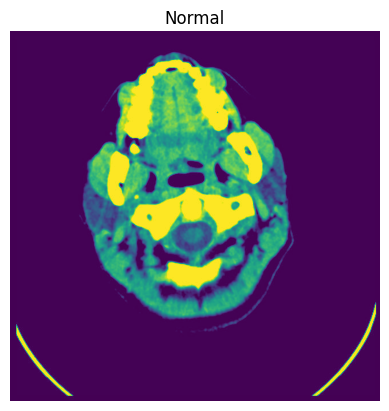

In [19]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  
  return img

img = view_random_image(target_dir = "/content/dataset/Train/",target_class = "Normal")
img.shape

In [20]:
train_dir = "/content/dataset/Train/"
test_dir = "/content/dataset/Test/"
val_dir = "/content/dataset/Validation/"

In [21]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (300,300),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")

Found 1843 images belonging to 2 classes.
Found 437 images belonging to 2 classes.
Found 235 images belonging to 2 classes.


In [22]:
base_model = tf.keras.applications.vgg16.VGG16(include_top= False,)

base_model.trainable = False

# This is model 1 with dropout layer as 0.25
inputs1 = tf.keras.layers.Input(shape =(300,300,3), name = "input-layer")
x1 = base_model(inputs1)
print(f"Shape after passing inputs through base model: {x1.shape}")
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(0.25)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x1)
print(f"Shape after GlobalAveragePooling2D: {x1.shape}")
outputs1 = tf.keras.layers.Dense(2, activation = "softmax", name = "output-layer")(x1)
vgg16_1 = tf.keras.Model(inputs1, outputs1)

# This is model 2 with dropout layer as 0.5
inputs2 = tf.keras.layers.Input(shape =(300,300,3), name = "input-layer")
x2 = base_model(inputs2)
print(f"Shape after passing inputs through base model: {x2.shape}")
x2 = Dense(256, activation='relu')(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x2)
print(f"Shape after GlobalAveragePooling2D: {x2.shape}")
outputs2 = tf.keras.layers.Dense(2, activation = "softmax", name = "output-layer")(x2)
vgg16_2 = tf.keras.Model(inputs2, outputs2)

# This is model 1 with dropout layer as 0.75
inputs3 = tf.keras.layers.Input(shape =(300,300,3), name = "input-layer")
x3 = base_model(inputs3)
print(f"Shape after passing inputs through base model: {x3.shape}")
x3 = Dense(256, activation='relu')(x3)
x3 = Dropout(0.75)(x3)
x3 = Dense(128, activation='relu')(x3)
x3 = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x3)
print(f"Shape after GlobalAveragePooling2D: {x3.shape}")
outputs3 = tf.keras.layers.Dense(2, activation = "softmax", name = "output-layer")(x3)
vgg16_3 = tf.keras.Model(inputs3, outputs3)

Shape after passing inputs through base model: (None, 9, 9, 512)
Shape after GlobalAveragePooling2D: (None, 128)
Shape after passing inputs through base model: (None, 9, 9, 512)
Shape after GlobalAveragePooling2D: (None, 128)
Shape after passing inputs through base model: (None, 9, 9, 512)
Shape after GlobalAveragePooling2D: (None, 128)


In [24]:
#Compile the 1st model
vgg16_1.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),metrics = ["accuracy"])
history1 = vgg16_1.fit(train_data,epochs=10,steps_per_epoch = len(train_data),validation_data = val_data,validation_steps = int(0.25*len(val_data)),)

Epoch 1/10
58/58 [==============================] - 61s 277ms/step - loss: 0.6639 - accuracy: 0.5936 - val_loss: 0.6444 - val_accuracy: 0.6250
Epoch 2/10
58/58 [==============================] - 16s 275ms/step - loss: 0.6185 - accuracy: 0.6636 - val_loss: 0.6642 - val_accuracy: 0.6562
Epoch 3/10
58/58 [==============================] - 16s 275ms/step - loss: 0.5816 - accuracy: 0.6913 - val_loss: 0.7417 - val_accuracy: 0.5625
Epoch 4/10
58/58 [==============================] - 16s 278ms/step - loss: 0.5580 - accuracy: 0.7081 - val_loss: 0.5469 - val_accuracy: 0.7656
Epoch 5/10
58/58 [==============================] - 16s 281ms/step - loss: 0.5257 - accuracy: 0.7396 - val_loss: 0.4603 - val_accuracy: 0.8125
Epoch 6/10
58/58 [==============================] - 16s 282ms/step - loss: 0.4788 - accuracy: 0.7699 - val_loss: 0.4355 - val_accuracy: 0.7969
Epoch 7/10
58/58 [==============================] - 17s 285ms/step - loss: 0.4729 - accuracy: 0.7716 - val_loss: 0.4966 - val_accuracy: 0.7500

In [26]:
#Compile the 2nd model
vgg16_2.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),metrics = ["accuracy"])
history2 = vgg16_2.fit(train_data,epochs=10,steps_per_epoch = len(train_data),validation_data = val_data,validation_steps = int(0.25*len(val_data)),)

Epoch 1/10
58/58 [==============================] - 20s 301ms/step - loss: 0.3637 - accuracy: 0.8432 - val_loss: 0.4429 - val_accuracy: 0.8125
Epoch 2/10
58/58 [==============================] - 16s 280ms/step - loss: 0.3344 - accuracy: 0.8508 - val_loss: 0.5056 - val_accuracy: 0.7344
Epoch 3/10
58/58 [==============================] - 17s 297ms/step - loss: 0.3181 - accuracy: 0.8578 - val_loss: 0.3546 - val_accuracy: 0.7812
Epoch 4/10
58/58 [==============================] - 17s 290ms/step - loss: 0.2887 - accuracy: 0.8774 - val_loss: 0.3277 - val_accuracy: 0.8594
Epoch 5/10
58/58 [==============================] - 17s 287ms/step - loss: 0.2638 - accuracy: 0.8931 - val_loss: 0.4468 - val_accuracy: 0.7656
Epoch 6/10
58/58 [==============================] - 17s 288ms/step - loss: 0.2741 - accuracy: 0.8763 - val_loss: 0.3554 - val_accuracy: 0.8281
Epoch 7/10
58/58 [==============================] - 17s 297ms/step - loss: 0.2299 - accuracy: 0.9002 - val_loss: 0.5439 - val_accuracy: 0.7500

In [27]:
#Compile the 3rd model
vgg16_3.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),metrics = ["accuracy"])
history3 = vgg16_3.fit(train_data,epochs=10,steps_per_epoch = len(train_data),validation_data = val_data,validation_steps = int(0.25*len(val_data)),)

Epoch 1/10
58/58 [==============================] - 19s 295ms/step - loss: 0.8228 - accuracy: 0.5665 - val_loss: 0.6552 - val_accuracy: 0.6562
Epoch 2/10
58/58 [==============================] - 17s 285ms/step - loss: 0.6783 - accuracy: 0.5898 - val_loss: 0.6595 - val_accuracy: 0.6250
Epoch 3/10
58/58 [==============================] - 17s 289ms/step - loss: 0.6566 - accuracy: 0.5996 - val_loss: 0.6225 - val_accuracy: 0.6719
Epoch 4/10
58/58 [==============================] - 17s 289ms/step - loss: 0.6418 - accuracy: 0.6126 - val_loss: 0.5920 - val_accuracy: 0.6719
Epoch 5/10
58/58 [==============================] - 17s 289ms/step - loss: 0.6196 - accuracy: 0.6603 - val_loss: 0.6181 - val_accuracy: 0.6875
Epoch 6/10
58/58 [==============================] - 17s 288ms/step - loss: 0.6153 - accuracy: 0.6571 - val_loss: 0.5822 - val_accuracy: 0.7344
Epoch 7/10
58/58 [==============================] - 17s 288ms/step - loss: 0.6004 - accuracy: 0.6717 - val_loss: 0.5434 - val_accuracy: 0.7344

In [28]:
vgg16_1.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 300, 300, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 dense_12 (Dense)            (None, 9, 9, 256)         131328    
                                                                 
 dropout_6 (Dropout)         (None, 9, 9, 256)         0         
                                                                 
 dense_13 (Dense)            (None, 9, 9, 128)         32896     
                                                                 
 global_average_pooling_laye  (None, 128)              0         
 r (GlobalAveragePooling2D)                                      
                                                           

In [29]:
vgg16_2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 300, 300, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 dense_14 (Dense)            (None, 9, 9, 256)         131328    
                                                                 
 dropout_7 (Dropout)         (None, 9, 9, 256)         0         
                                                                 
 dense_15 (Dense)            (None, 9, 9, 128)         32896     
                                                                 
 global_average_pooling_laye  (None, 128)              0         
 r (GlobalAveragePooling2D)                                      
                                                           

In [30]:
vgg16_3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 300, 300, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 dense_16 (Dense)            (None, 9, 9, 256)         131328    
                                                                 
 dropout_8 (Dropout)         (None, 9, 9, 256)         0         
                                                                 
 dense_17 (Dense)            (None, 9, 9, 128)         32896     
                                                                 
 global_average_pooling_laye  (None, 128)              0         
 r (GlobalAveragePooling2D)                                      
                                                           

In [31]:
vgg16_1.evaluate(test_data)

14/14 [==============================] - 8s 553ms/step - loss: 0.7562 - accuracy: 0.6545


[0.7561937570571899, 0.6544622182846069]

In [32]:
vgg16_2.evaluate(test_data)

14/14 [==============================] - 3s 215ms/step - loss: 0.5730 - accuracy: 0.7689


[0.5730345845222473, 0.768878698348999]

In [33]:
vgg16_3.evaluate(test_data)

14/14 [==============================] - 3s 214ms/step - loss: 0.6042 - accuracy: 0.6270


[0.6041715741157532, 0.6270022988319397]



```
# The model with dropout as 0.5 is the highest. Then followed by the dropout with value 0.25 and 0.75.
```